In [1]:
# import numpy 
import numpy as np

In [2]:
# initialize a numpy array
a = np.array([1, 5, 3, 7, 9, 4, 10])
a

array([ 1,  5,  3,  7,  9,  4, 10])

In [3]:
# What shape (dimension) does the array have?
print(f'shape of b = {a.shape}')
a[4] = 20
print(a)

shape of b = (7,)
[ 1  5  3  7 20  4 10]


In [4]:
# initialize a matrix, and inspect
b = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
print(b.shape)
print(b[0,0])
print(b[1,:])
print(np.transpose(b))

(3, 3)
1
[4 5 6]
[[1 4 7]
 [2 5 8]
 [3 6 9]]


In [5]:
# show elements larger than 5
print(a[a>5])

[ 7 20 10]


In [6]:
# math
print(a + 5) # each element + 5
print(a / np.array([2,3,1,4,10,7,1])) # element-wise 

[ 6 10  8 12 25  9 15]
[ 0.5         1.66666667  3.          1.75        2.          0.57142857
 10.        ]


In [7]:
# summation
print(np.sum(b))
print(np.sum(b, axis=1))
print(np.sum(b, axis=0))

print(np.mean(b))

45
[ 6 15 24]
[12 15 18]
5.0


In [8]:
# generate arrays
x = np.arange(15)
print(x)
print(np.sqrt(x))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.         3.16227766 3.31662479
 3.46410162 3.60555128 3.74165739]


In [9]:
# Open the "2018051011_pangaea.txt" textfile and read in the values using numpy! 
data = np.genfromtxt("data/2018051011_pangaea.txt", delimiter="\t", skip_header=16)
print(data)
print(data.shape)

[[ 1.00000e+01  1.00156e+03  1.06000e+01  8.60000e+01  2.73000e+02
   7.60000e+00]
 [ 1.40000e+01  1.00110e+03  1.07100e+01  8.54000e+01  2.64000e+02
   7.70000e+00]
 [ 1.90000e+01  1.00046e+03  1.07600e+01  8.50000e+01  2.59000e+02
   7.90000e+00]
 ...
 [ 3.00740e+04  9.87000e+00 -6.77600e+01  1.00000e+00  2.61000e+02
   3.76000e+01]
 [ 3.00780e+04  9.86000e+00 -6.74400e+01  1.00000e+00  2.61000e+02
   3.77000e+01]
 [ 3.00810e+04  9.86000e+00 -6.73500e+01  1.00000e+00  2.61000e+02
   3.77000e+01]]
(6036, 6)


In [10]:
# Assign the column names to the extracted data for better readability.
altitude = data[:,0]
print(altitude)
pressure = data[:,1]
temperature = data[:,2]
rh = data[:,3]
dd = data[:,4]
ff = data[:,5]
print(ff)

[1.0000e+01 1.4000e+01 1.9000e+01 ... 3.0074e+04 3.0078e+04 3.0081e+04]
[ 7.6  7.7  7.9 ... 37.6 37.7 37.7]


In [1]:
# dew point calculation
def calculate_dewpoint(temperature, rh):
    Esaett = 6.107e2 * np.exp((17.08*temperature)/(234.2 + temperature))
    wvparpress = rh/100*Esaett
    tau = 234.2/((17.08/(np.log(wvparpress/6.107e2)))-1)
    return tau

In [2]:
# calculate wind components
def calculate_wind_components(wdir, wspeed):
    u = -wspeed * np.sin(wdir)
    v = -wspeed * np.cos(wdir)
    return u, v

tau = calculate_dewpoint(temperature, rh)
u,v = calculate_wind_components(dd*np.pi/180, ff)
tpot = (temperature + 273.15) * np.power(pressure[0]/pressure, 287/1005)

NameError: name 'temperature' is not defined

In [21]:
# this line necessary for jupyter notebooks visualization
%matplotlib inline

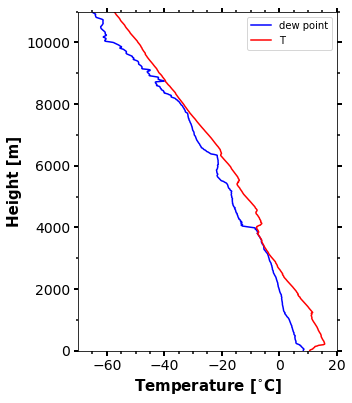

In [61]:
# matplotlib (plot dew point and temperature)
import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots(1, figsize=(5,5.7))

ax.plot(tau, altitude, color='blue', label='dew point')
ax.plot(temperature, altitude, color='red', label='T')

ax.set_ylim([0,11000])
ax.set_xlim([-70,20])

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(4))
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.set_xlabel('Temperature [$^{\circ}$C]', fontweight='semibold', fontsize=15)
ax.set_ylabel('Height [m]', fontweight='semibold', fontsize=15)
#ax.legend(fontsize=13, bbox_to_anchor=(0.2,0.9,0.9,0.102))

ax.tick_params(axis='both', which='major', labelsize=14,
               width=2, length=4.5, right=True, top=True)
ax.tick_params(axis='both', which='minor', labelsize=14,
               width=1.5, length=2.5, right=True, top=True)
ax.legend()

#plt.tight_layout()
#savename = f'{dt:%Y%m%d_%H%M}_profile_t.png'
#fig.savefig(savename, dpi=250)



In [ ]:
fig, ax = plt.subplots(1, figsize=(5,5.7))

ax.plot(tpot, altitude, color='darkgreen')
barb_x_loc = np.ones(altitude.shape)*285
ax.barbs(barb_x_loc[::100], altitude[::100], u[::100], v[::100], 
         pivot='middle', length=7)

ax.set_ylim([0,11000])
ax.set_xlim([280,335])

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.set_xlabel('pot. Temp [K]', fontweight='semibold', fontsize=15)
ax.set_ylabel('Height [m]', fontweight='semibold', fontsize=15)
ax.legend(fontsize=13, bbox_to_anchor=(0.2,0.9,0.9,0.102))

ax.tick_params(axis='both', which='major', labelsize=14,
               width=2, length=4.5, right=True, top=True)
ax.tick_params(axis='both', which='minor', labelsize=14,
               width=1.5, length=2.5, right=True, top=True)

#plt.tight_layout()
#savename = '{}_profile_tpot_wind.png'.format(dt.strftime('%Y%m%d_%H%M'))
#fig.savefig(savename, dpi=250)